# LinkedIn Learning
# Python Statistics Essential Training
# Dataset Used : Ames Iowa Housing Dataset

## 3. Linear Regression
### A. Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Clean_house.csv')

In [3]:
from sklearn import linear_model, model_selection, preprocessing

In [4]:
X = data.select_dtypes('number').drop(columns = 'SalePrice')
y = data.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 42)

In [5]:
X_train

,Unnamed: 0,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
844,844,845,907181100,20,68.0,9017,7,5,1999,1999,...,666.0,0,35,0,0,0,0,0,9,2009
2730,2730,2731,905351045,150,NaN,1700,7,5,1980,1981,...,450.0,188,36,0,0,200,0,0,4,2006
2793,2793,2794,907255050,20,NaN,14781,8,5,2001,2002,...,748.0,198,150,0,0,0,0,0,8,2006
1187,1187,1188,534127230,20,85.0,11050,6,5,1968,1968,...,512.0,25,0,0,0,192,0,0,10,2008
2770,2770,2771,907130110,60,65.0,12438,6,5,1995,1995,...,473.0,413,91,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,1639,527226040,190,195.0,41600,5,5,1969,1990,...,828.0,144,0,0,0,0,0,0,11,2007
1095,1095,1096,528290090,60,NaN,7750,7,5,2002,2002,...,403.0,100,35,0,0,0,0,0,4,2008
1130,1130,1131,528490080,60,64.0,8791,6,5,2003,2003,...,673.0,216,56,0,0,0,0,0,5,2008
1294,1294,1295,902109160,50,81.0,7308,5,5,1920,1950,...,225.0,0,0,236,0,0,0,0,6,2008


In [13]:
X_train.isna().any()

Unnamed: 0         False
Order              False
PID                False
MS SubClass        False
Lot Frontage        True
Lot Area           False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Mas Vnr Area        True
BsmtFin SF 1        True
BsmtFin SF 2        True
Bsmt Unf SF         True
Total Bsmt SF       True
1st Flr SF         False
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area        False
Bsmt Full Bath      True
Bsmt Half Bath      True
Full Bath          False
Half Bath          False
Bedroom AbvGr      False
Kitchen AbvGr      False
TotRms AbvGrd      False
Fireplaces         False
Garage Yr Blt       True
Garage Cars         True
Garage Area         True
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Pool Area          False
Misc Val           False
Mo Sold            False
Yr Sold            False
dtype: bool

In [14]:
def shrinks_int(data):
    mapping = {}
    for col in data.dtypes[data.dtypes == 'int64[pyarrow]'].index:
        max_ = data[col].max()
        min_ = data[col].min()
        if min_ < 0:
            continue
        elif max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint32[pyarrow]'
        
    return data.astype(mapping)

In [15]:
def clean_house_no_na(data):
    return(data
          .assign(** data.select_dtypes('string').replace('','Missing').astype('category'),
        ** {'Garage Yr Blt': data['Garage Yr Blt'].clip(upper = data['Year Built'].max())})
    .pipe(shrinks_int)
    .pipe(lambda df_ : df_.assign(**df_.select_dtypes('number').fillna(0)))
          )

In [16]:
housing_2 = clean_house_no_na(data)

In [6]:
X_test

,Unnamed: 0,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1357,1357,1358,903427090,70,NaN,5100,8,7,1925,1996,...,228.0,192,63,0,0,0,0,0,6,2008
2367,2367,2368,527450460,160,21.0,1890,6,7,1972,1972,...,264.0,0,0,0,0,0,0,0,7,2006
2822,2822,2823,908128100,60,62.0,7162,7,5,2003,2004,...,616.0,168,57,0,0,0,0,0,5,2006
2126,2126,2127,907135180,20,60.0,8070,4,5,1994,1995,...,0.0,0,0,0,0,0,0,0,8,2007
1544,1544,1545,910200080,30,50.0,7000,6,8,1926,1998,...,195.0,0,0,116,0,0,0,0,7,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2521,2522,533253160,120,40.0,3876,8,5,1978,1978,...,484.0,133,60,0,0,0,0,0,7,2006
707,707,708,902204080,30,62.0,7404,4,6,1920,1950,...,288.0,0,0,128,0,0,0,0,11,2009
424,424,425,528106070,20,108.0,13173,9,5,2006,2007,...,840.0,404,102,0,0,0,0,0,11,2009
69,69,70,528458110,20,75.0,9000,8,5,2008,2008,...,750.0,144,168,0,0,0,0,0,4,2010


In [7]:
y_train

844     192000
2730    148400
2793    275000
1187    150000
2770    187000
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2197, dtype: int64

In [8]:
y_test

1357    161000
2367    116000
2822    196500
2126    123600
1544    126000
         ...  
2521    170000
707      80000
424     325000
69      262500
736     132500
Name: SalePrice, Length: 733, dtype: int64

In [17]:
X = housing_2.select_dtypes('number').drop(columns = 'SalePrice')
y = housing_2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 42)

In [18]:
X_train

,Unnamed: 0,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
844,844,845,907181100,20,68.0,9017,7,5,1999,1999,...,666.0,0,35,0,0,0,0,0,9,2009
2730,2730,2731,905351045,150,0.0,1700,7,5,1980,1981,...,450.0,188,36,0,0,200,0,0,4,2006
2793,2793,2794,907255050,20,0.0,14781,8,5,2001,2002,...,748.0,198,150,0,0,0,0,0,8,2006
1187,1187,1188,534127230,20,85.0,11050,6,5,1968,1968,...,512.0,25,0,0,0,192,0,0,10,2008
2770,2770,2771,907130110,60,65.0,12438,6,5,1995,1995,...,473.0,413,91,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,1639,527226040,190,195.0,41600,5,5,1969,1990,...,828.0,144,0,0,0,0,0,0,11,2007
1095,1095,1096,528290090,60,0.0,7750,7,5,2002,2002,...,403.0,100,35,0,0,0,0,0,4,2008
1130,1130,1131,528490080,60,64.0,8791,6,5,2003,2003,...,673.0,216,56,0,0,0,0,0,5,2008
1294,1294,1295,902109160,50,81.0,7308,5,5,1920,1950,...,225.0,0,0,236,0,0,0,0,6,2008


In [19]:
X_train.isna().any()

Unnamed: 0         False
Order              False
PID                False
MS SubClass        False
Lot Frontage       False
Lot Area           False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Mas Vnr Area       False
BsmtFin SF 1       False
BsmtFin SF 2       False
Bsmt Unf SF        False
Total Bsmt SF      False
1st Flr SF         False
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area        False
Bsmt Full Bath     False
Bsmt Half Bath     False
Full Bath          False
Half Bath          False
Bedroom AbvGr      False
Kitchen AbvGr      False
TotRms AbvGrd      False
Fireplaces         False
Garage Yr Blt      False
Garage Cars        False
Garage Area        False
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Pool Area          False
Misc Val           False
Mo Sold            False
Yr Sold            False
dtype: bool

In [20]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8434331967222726

### B. Interpreting Linear Regression Models

In [21]:
lr.coef_

array([-4.81647327e+09,  4.81647326e+09,  1.78166099e-06, -1.63222582e+02,
        2.81572092e+01,  4.92330897e-01,  1.73540185e+04,  4.83914704e+03,
        3.91823317e+02,  1.76886980e+02,  2.72602807e+01,  1.05872850e+01,
        4.12998067e+00, -2.71428346e+00,  1.20029821e+01,  1.87203745e+01,
        2.54839130e+01, -9.18251591e+00,  3.50217718e+01,  7.38994141e+03,
       -1.49999981e+03, -1.22058287e+02, -5.39314413e+03, -7.72290641e+03,
       -1.43642441e+04,  1.35918155e+03,  3.49792178e+03, -1.31017989e+01,
        1.03259737e+04,  1.50570634e+01,  1.98862097e+01, -6.13562466e+00,
        2.03507503e+01, -5.73946496e+00,  7.07705298e+01, -3.93667877e+01,
       -8.71460317e+00,  2.39569086e+02, -8.15808295e+03])

In [23]:
lr.intercept_

-4801233671.323493

In [22]:
lr.feature_names_in_

array(['Unnamed: 0', 'Order', 'PID', 'MS SubClass', 'Lot Frontage',
       'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'Misc Val', 'Mo Sold', 'Yr Sold'], dtype=object)

In [24]:
pd.Series(lr.coef_, index = lr.feature_names_in_)

Unnamed: 0        -4.816473e+09
Order              4.816473e+09
PID                1.781661e-06
MS SubClass       -1.632226e+02
Lot Frontage       2.815721e+01
Lot Area           4.923309e-01
Overall Qual       1.735402e+04
Overall Cond       4.839147e+03
Year Built         3.918233e+02
Year Remod/Add     1.768870e+02
Mas Vnr Area       2.726028e+01
BsmtFin SF 1       1.058729e+01
BsmtFin SF 2       4.129981e+00
Bsmt Unf SF       -2.714283e+00
Total Bsmt SF      1.200298e+01
1st Flr SF         1.872037e+01
2nd Flr SF         2.548391e+01
Low Qual Fin SF   -9.182516e+00
Gr Liv Area        3.502177e+01
Bsmt Full Bath     7.389941e+03
Bsmt Half Bath    -1.500000e+03
Full Bath         -1.220583e+02
Half Bath         -5.393144e+03
Bedroom AbvGr     -7.722906e+03
Kitchen AbvGr     -1.436424e+04
TotRms AbvGrd      1.359182e+03
Fireplaces         3.497922e+03
Garage Yr Blt     -1.310180e+01
Garage Cars        1.032597e+04
Garage Area        1.505706e+01
Wood Deck SF       1.988621e+01
Open Por

<Axes: >

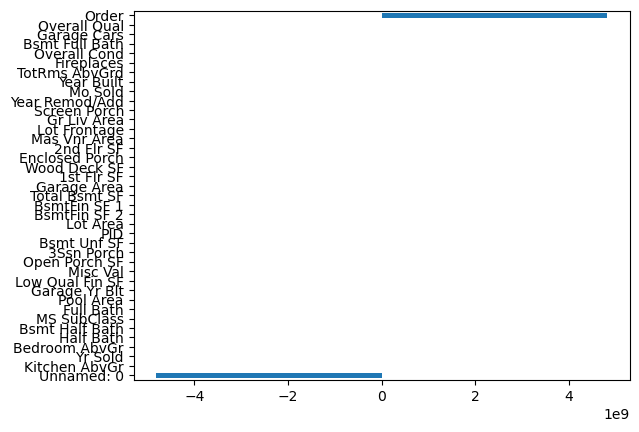

In [25]:
pd.Series(lr.coef_, index = lr.feature_names_in_).sort_values().plot.barh()

<Axes: >

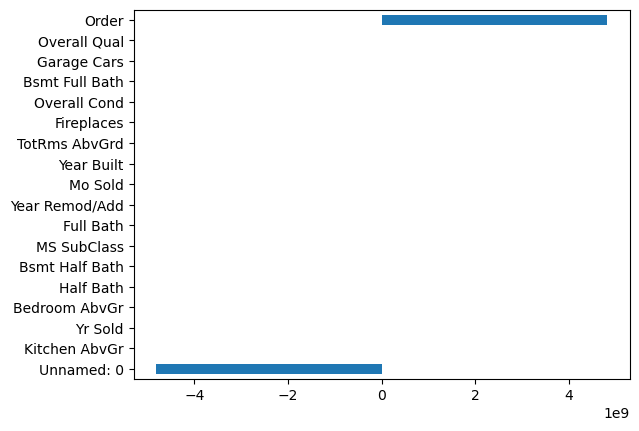

In [26]:
(
    pd.Series(lr.coef_, index = lr.feature_names_in_)
    .pipe(lambda ser : ser[ser.abs() > 100])
    .sort_values()
    .plot.barh()
)

In [27]:
(
    pd.Series(lr.coef_, index = lr.feature_names_in_)
    .pipe(lambda ser : ser[ser.abs() > 100])
    .sort_values()
    .index
)

Index(['Unnamed: 0', 'Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual', 'Order'],
      dtype='object')

### C. Standardizing Values

In [28]:
X = housing_2.select_dtypes('number').drop(columns = 'SalePrice')
y = housing_2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,random_state = 42)

std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [29]:
lr_1 = linear_model.LinearRegression()
lr_1.fit(X_train, y_train)
lr_1.score(X_test, y_test)

0.8327156144696627

<Axes: >

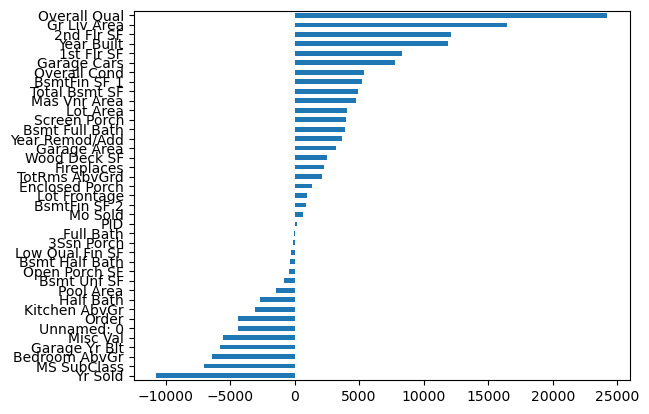

In [31]:
pd.Series(lr_1.coef_, index = X.columns).sort_values().plot.barh()

<Axes: >

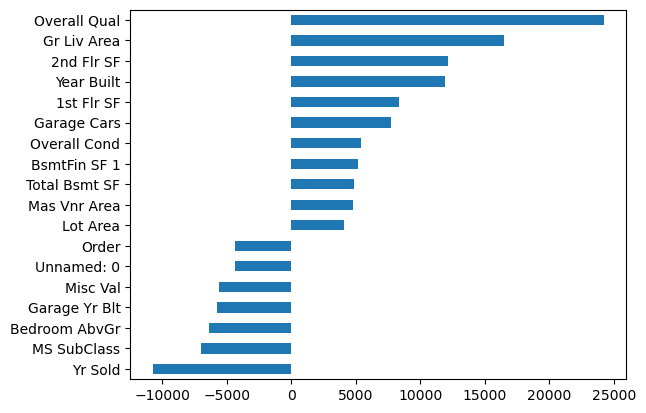

In [37]:
(
    pd.Series(lr_1.coef_, index = X.columns)
    .sort_values()
    .pipe(lambda ser : ser[ser.abs() > 4000])
    .plot.barh()
)

In [38]:
pd.Series(lr_1.coef_, index = X.columns).sort_values().index

Index(['Yr Sold', 'MS SubClass', 'Bedroom AbvGr', 'Garage Yr Blt', 'Misc Val',
       'Unnamed: 0', 'Order', 'Kitchen AbvGr', 'Half Bath', 'Pool Area',
       'Bsmt Unf SF', 'Open Porch SF', 'Bsmt Half Bath', 'Low Qual Fin SF',
       '3Ssn Porch', 'Full Bath', 'PID', 'Mo Sold', 'BsmtFin SF 2',
       'Lot Frontage', 'Enclosed Porch', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Garage Area', 'Year Remod/Add', 'Bsmt Full Bath',
       'Screen Porch', 'Lot Area', 'Mas Vnr Area', 'Total Bsmt SF',
       'BsmtFin SF 1', 'Overall Cond', 'Garage Cars', '1st Flr SF',
       'Year Built', '2nd Flr SF', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [39]:
simple_feats = set(['Kitchen AbvGr', 'Half Bath', 'Pool Area',
       'Bsmt Unf SF', 'Open Porch SF', 'Bsmt Half Bath', 'Low Qual Fin SF',
       '3Ssn Porch', 'Full Bath', 'PID', 'Mo Sold', 'BsmtFin SF 2',
       'Lot Frontage', 'Enclosed Porch', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Garage Area', 'Year Remod/Add', 'Bsmt Full Bath',
       'Screen Porch', 'Lot Area', 'Mas Vnr Area', 'Total Bsmt SF',
       'BsmtFin SF 1', 'Overall Cond', 'Garage Cars', '1st Flr SF',
       'Year Built', '2nd Flr SF', 'Gr Liv Area', 'Overall Qual'])
std_feats = set(['Yr Sold', 'MS SubClass', 'Bedroom AbvGr', 'Garage Yr Blt', 'Misc Val',
       'Unnamed: 0', 'Order'])

print(sorted(simple_feats | std_feats))

['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Enclosed Porch', 'Fireplaces', 'Full Bath', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Lot Area', 'Lot Frontage', 'Low Qual Fin SF', 'MS SubClass', 'Mas Vnr Area', 'Misc Val', 'Mo Sold', 'Open Porch SF', 'Order', 'Overall Cond', 'Overall Qual', 'PID', 'Pool Area', 'Screen Porch', 'TotRms AbvGrd', 'Total Bsmt SF', 'Unnamed: 0', 'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']


In [43]:
(
    X
    .assign(Saleprice = y)
    .corr()
    .loc[['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 
          'BsmtFin SF 1', 'BsmtFin SF 2', 'Enclosed Porch', 'Fireplaces', 'Full Bath', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 
          'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Lot Area', 'Lot Frontage', 'Low Qual Fin SF', 'MS SubClass', 'Mas Vnr Area', 
          'Misc Val', 'Mo Sold', 'Open Porch SF', 'Order', 'Overall Cond', 'Overall Qual', 'PID', 'Pool Area', 'Screen Porch', 'TotRms AbvGrd', 
          'Total Bsmt SF', 'Unnamed: 0', 'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']]
    .style
    .background_gradient(cmap = 'RdBu', vmin = -1, vmax = 1)
    .set_sticky(axis = 'index')
)

,Unnamed: 0,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Saleprice
1st Flr SF,-0.013201,-0.013201,-0.141902,-0.247828,0.241707,0.332235,0.477837,-0.157052,0.310463,0.242108,0.392280,0.457586,0.084710,0.296139,0.800429,1.000000,-0.250057,-0.012689,0.562166,0.257836,0.010469,0.371584,-0.104203,0.106648,0.076025,0.390162,0.406345,0.147876,0.439471,0.491208,0.227131,0.238041,-0.065713,0.044061,0.098316,0.121821,0.093003,0.040496,-0.013667,0.621676
2nd Flr SF,-0.000417,-0.000417,-0.003289,0.304237,-0.002813,0.032996,0.241402,0.006218,0.016828,0.158939,0.120159,-0.163710,-0.098188,0.002320,-0.204487,-0.250057,1.000000,0.018024,0.655251,-0.163068,-0.059458,0.404143,0.611634,0.504651,0.069444,0.585214,0.165844,0.041983,0.180882,0.127508,0.089097,0.184538,0.055429,-0.032172,0.011741,0.044602,-0.005078,0.013247,-0.018530,0.269373
3Ssn Porch,-0.024975,-0.024975,-0.024894,-0.037956,0.004061,0.016243,0.018240,0.043852,0.015803,0.037412,0.014222,0.050567,-0.023314,-0.005399,0.037918,0.044061,-0.032172,-0.004505,0.006481,0.027086,0.026971,0.015435,-0.023231,-0.047151,-0.021379,-0.025097,0.018414,0.015282,0.023405,0.029511,-0.003967,-0.009458,-0.032674,1.000000,-0.029430,-0.006501,-0.000753,0.027229,0.022668,0.032225
Bedroom AbvGr,0.015424,0.015424,0.006345,-0.019208,0.112718,0.136569,0.063291,-0.006137,-0.055093,-0.021536,0.080590,-0.118575,-0.033033,0.188508,0.052721,0.106648,0.504651,0.070531,0.516808,-0.161084,0.020333,0.359489,0.247053,1.000000,0.240737,0.672647,0.076971,-0.038905,0.091135,0.073417,0.029711,0.083650,0.052115,-0.047151,0.009250,0.036707,0.000887,0.053677,-0.018008,0.143913
Bsmt Full Bath,-0.042499,-0.042499,-0.038306,0.014187,0.019554,0.124208,0.168373,-0.043458,0.212119,0.134590,0.139684,0.640212,0.163634,-0.398629,0.326861,0.257836,-0.163068,-0.047215,0.057367,1.000000,-0.149027,-0.023011,-0.035385,-0.161084,-0.018349,-0.043642,0.172775,0.064179,0.162644,0.184903,0.187283,0.080765,-0.069014,0.027086,0.052355,0.043730,-0.004817,-0.003322,0.044805,0.275823
Bsmt Half Bath,0.024987,0.024987,0.004154,-0.003179,-0.031798,0.026448,-0.041433,0.084185,-0.030515,-0.046175,0.016609,0.077687,0.099147,-0.105784,0.012850,0.010469,-0.059458,-0.013385,-0.043498,-0.149027,1.000000,-0.046371,-0.057999,0.020333,-0.064671,-0.048069,0.038089,0.001307,-0.033210,-0.021147,0.051546,-0.035276,-0.009272,0.026971,0.042372,0.066911,0.036996,0.022741,-0.019556,-0.035817
Bsmt Unf SF,0.005842,0.005842,-0.088102,-0.129987,0.139290,0.023883,0.270527,-0.137303,0.129311,0.165397,0.089662,-0.477244,-0.238420,1.000000,0.412248,0.296139,0.002320,0.047207,0.235870,-0.398629,-0.105784,0.274901,-0.033530,0.188508,0.065651,0.251633,0.001790,0.013214,0.180080,0.164837,-0.039285,0.119143,0.006383,-0.005399,-0.047945,-0.031963,-0.010125,0.021915,-0.036443,0.183308
BsmtFin SF 1,-0.032268,-0.032268,-0.098674,-0.059767,0.067034,0.191692,0.284458,-0.051341,0.280069,0.152240,0.299951,1.000000,-0.054022,-0.477244,0.536731,0.457586,-0.163710,-0.066129,0.209944,0.640212,0.077687,0.078086,-0.008205,-0.118575,-0.086654,0.048118,0.296098,0.125795,0.255311,0.309649,0.224199,0.125150,-0.100318,0.050567,0.095952,0.084147,0.092900,-0.000884,0.022341,0.433147
BsmtFin SF 2,-0.002758,-0.002758,-0.001245,-0.070847,-0.005254,0.083198,-0.041122,0.040992,-0.027328,-0.061934,-0.014955,-0.054022,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.163634,0.099147,-0.076262,-0.033004,-0.033033,-0.037864,-0.049288,0.067180,0.048897,-0.014118,0.003625,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089,0.006018
Enclosed Porch,0.027908,0.02790

### D. Regression with XGBoost

In [54]:
X = housing_2.select_dtypes('number').drop(columns = 'SalePrice')
y = housing_2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,random_state = 42)

std = preprocessing.StandardScaler().set_output(transform = 'pandas')
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [49]:
import xgboost as xgb

In [55]:
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.8091572046464495

<Axes: >

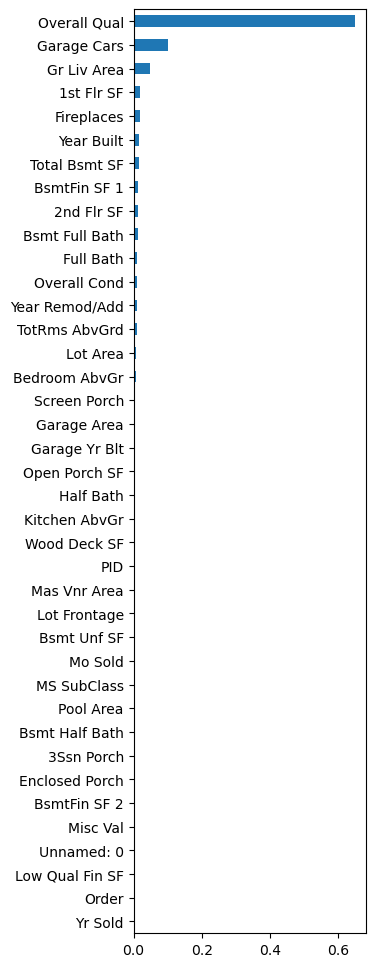

In [56]:
pd.Series(xg.feature_importances_, index = X_train.columns).sort_values().plot.barh(figsize = (3,12))

In [65]:
# Use Categories

# Convert numeric columns to nullable integer type
X_cat = data.select_dtypes(include='number').astype('Int64').drop(columns = 'SalePrice')

# Convert object columns (categorical) to category type
X_cat = X_cat.join(data.select_dtypes(include='object').apply(lambda col: col.astype('category')))

# Separate the target variable 'SalePrice'
y_cat = data['SalePrice']

X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state = 42)

xg_cat = xgb.XGBRegressor(enable_categorical = True, tree_method = 'hist')
xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

0.918679775914547

<Axes: >

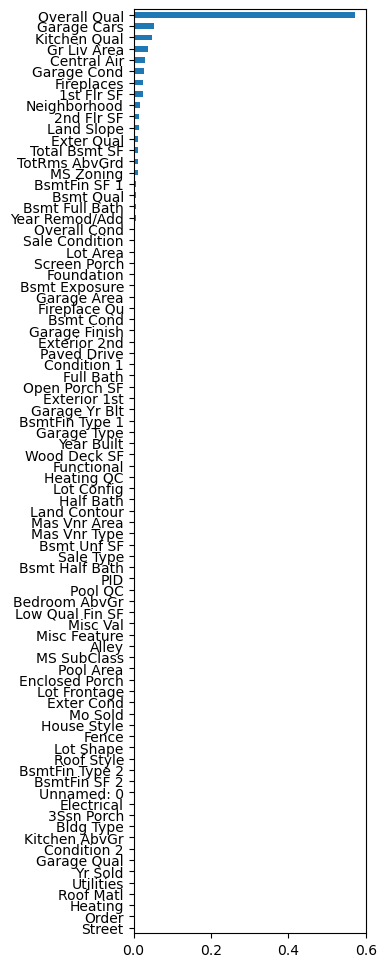

In [66]:
pd.Series(xg_cat.feature_importances_, index = X_cat_train.columns).sort_values().plot.barh(figsize = (3,12))

### E. Challenge 3: Predict Ames

In [71]:
# Create a Linear Regression Model using the top 5 features from the(non - categorical) XGBoost model
# What is the .score of the model?

top_5 = list(pd.Series(xg.feature_importances_, index = X_train.columns).sort_values().index[-5:])
top_5

['Fireplaces', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Overall Qual']

In [73]:
lr_top5 = linear_model.LinearRegression()
lr_top5.fit(X_train.loc[:, top_5], y_train)
lr_top5.score(X_test.loc[:, top_5], y_test)

0.7867423607235032

## 4. Hypothesis Testing
### A. Exploring Data

In [74]:
from scipy import stats
housing_2.Neighborhood.value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [75]:
housing_2.groupby('Neighborhood').describe()

Unnamed: 0                                                     \
                  count         mean          std     min      25%     50%   
Neighborhood                                                                 
Blmngtn            28.0  1499.000000   882.971205    52.0   472.75  1741.5   
Blueste            10.0  1186.800000   687.000210   298.0   932.25   934.5   
BrDale             30.0  1316.933333   852.662076    29.0   406.25  1044.5   
BrkSide           108.0  1464.037037   778.979802   129.0   741.75  1342.5   
ClearCr            44.0  1550.681818   895.214610   208.0   784.25  1404.0   
CollgCr           267.0  1682.273408   811.009037   249.0   866.50  1476.0   
Crawfor           103.0  1809.679612   778.304759   293.0   937.50  2198.0   
Edwards           194.0  1626.675258   852.935427   234.0   888.25  1501.5   
Gilbert           165.0  1284.254545   815.923617     4.0   478.00  1615.0   
Greens              8.0  1590.375000  1131.304170   106.0   458.00  2187.5   
GrnHill             2.0  2574.000000   449.719913  2256.0  2415.00  2574.0   
IDOTRR             93.0  1736.784946   798.086201   205.0  1360.00  1558.0   
Landmrk             1.0  2788.000000          NaN  2788.0  2788.00  2788.0   
MeadowV            37.0  1778.243243   959.225452   326.0   977.00  1600.0   
Mitchel           114.0  1706.078947   884.002664   309.0   971.25  1603.5   
NAmes             443.0  1395.733634   847.035881     0.0   635.50  1265.0   
NPkVill            23.0   850.826087   790.536967    32.0   409.50   415.0   
NWAmes            131.0  1244.251908   775.591252    19.0   582.50  1187.0   
NoRidge            71.0  1336.154930   850.279595    59.0   501.50  1157.0   
NridgHt           166.0  1225.819277   789.816490    36.0   446.25  1072.5   
OldTown           239.0  1453.271967   832.683117   158.0   708.50  1313.0   
SWISU              48.0  1495.583333   962.873046   211.0   905.75  1517.5   
Sawyer            151.0  1542.794702   877.468262    83.0   771.50  1397.0   
SawyerW           125.0  1217.232000   807.823701    72.0   546.00  1134.0   
Somerst           182.0  1283.609890   780.019717    22.0   526.25  1167.5   
StoneBr            51.0  1325.568627   839.230392     6.0   367.50  1631.0   
Timber             72.0  1720.347222   801.830901   314.0   964.75  1583.5   
Veenker            24.0  1551.291667   636.580913   563.0  1178.75  1827.5   

                               Order               ...  Yr Sold          \
                  75%     max  count         mean  ...      75%     max   
Neighborhood                                       ...                    
Blmngtn       2422.25  2429.0   28.0  1500.000000  ...  2009.00  2010.0   
Blueste       1542.75  2227.0   10.0  1187.800000  ...  2009.00  2010.0   
BrDale        2364.75  2372.0   30.0  1317.933333  ...  2009.00  2010.0   
BrkSide       2016.25  2687.0  108.0  1465.037037  ...  2009.00  2010.0   
ClearCr       2117.25  2767.0   44.0  1551.681818  ...  2009.00  2010.0   
CollgCr       2159.50  2815.0  267.0  1683.273408  ...  2009.00  2010.0   
Crawfor       2225.00  2884.0  103.0  1810.679612  ...  2009.00  2010.0   
Edwards       2187.75  2844.0  194.0  1627.675258  ...  2009.00  2010.0   
Gilbert       1756.00  2441.0  165.0  1285.254545  ...  2009.00  2010.0   
Greens        2519.25  2521.0    8.0  1591.375000  ...  2009.25  2010.0   
GrnHill       2733.00  2892.0    2.0  2575.000000  ...  2006.75  2007.0   
IDOTRR        2241.00  2882.0   93.0  1737.784946  ...  2008.00  2010.0   
Landmrk       2788.00  2788.0    1.0  2789.000000  ...  2006.00  2006.0   
MeadowV       2908.00  2920.0   37.0  1779.243243  ...  2009.00  2010.0   
Mitchel       2298.75  2929.0  114.0  1707.078947  ...  2009.00  2010.0   
NAmes         1960.50  2634.0  443.0  1396.733634  ...  2009.00  2010.0   
NPkVill       1364.00  2377.0   23.0   851.826087  ...  2009.00  2010.0   
NWAmes        1865.50  2540.0  131.0  1245.251908  ...  2009.00  2010.0   
NoRidge       1832.

In [76]:
housing_2.groupby('Neighborhood').describe()

Unnamed: 0                                                     \
                  count         mean          std     min      25%     50%   
Neighborhood                                                                 
Blmngtn            28.0  1499.000000   882.971205    52.0   472.75  1741.5   
Blueste            10.0  1186.800000   687.000210   298.0   932.25   934.5   
BrDale             30.0  1316.933333   852.662076    29.0   406.25  1044.5   
BrkSide           108.0  1464.037037   778.979802   129.0   741.75  1342.5   
ClearCr            44.0  1550.681818   895.214610   208.0   784.25  1404.0   
CollgCr           267.0  1682.273408   811.009037   249.0   866.50  1476.0   
Crawfor           103.0  1809.679612   778.304759   293.0   937.50  2198.0   
Edwards           194.0  1626.675258   852.935427   234.0   888.25  1501.5   
Gilbert           165.0  1284.254545   815.923617     4.0   478.00  1615.0   
Greens              8.0  1590.375000  1131.304170   106.0   458.00  2187.5   
GrnHill             2.0  2574.000000   449.719913  2256.0  2415.00  2574.0   
IDOTRR             93.0  1736.784946   798.086201   205.0  1360.00  1558.0   
Landmrk             1.0  2788.000000          NaN  2788.0  2788.00  2788.0   
MeadowV            37.0  1778.243243   959.225452   326.0   977.00  1600.0   
Mitchel           114.0  1706.078947   884.002664   309.0   971.25  1603.5   
NAmes             443.0  1395.733634   847.035881     0.0   635.50  1265.0   
NPkVill            23.0   850.826087   790.536967    32.0   409.50   415.0   
NWAmes            131.0  1244.251908   775.591252    19.0   582.50  1187.0   
NoRidge            71.0  1336.154930   850.279595    59.0   501.50  1157.0   
NridgHt           166.0  1225.819277   789.816490    36.0   446.25  1072.5   
OldTown           239.0  1453.271967   832.683117   158.0   708.50  1313.0   
SWISU              48.0  1495.583333   962.873046   211.0   905.75  1517.5   
Sawyer            151.0  1542.794702   877.468262    83.0   771.50  1397.0   
SawyerW           125.0  1217.232000   807.823701    72.0   546.00  1134.0   
Somerst           182.0  1283.609890   780.019717    22.0   526.25  1167.5   
StoneBr            51.0  1325.568627   839.230392     6.0   367.50  1631.0   
Timber             72.0  1720.347222   801.830901   314.0   964.75  1583.5   
Veenker            24.0  1551.291667   636.580913   563.0  1178.75  1827.5   

                               Order               ...  Yr Sold          \
                  75%     max  count         mean  ...      75%     max   
Neighborhood                                       ...                    
Blmngtn       2422.25  2429.0   28.0  1500.000000  ...  2009.00  2010.0   
Blueste       1542.75  2227.0   10.0  1187.800000  ...  2009.00  2010.0   
BrDale        2364.75  2372.0   30.0  1317.933333  ...  2009.00  2010.0   
BrkSide       2016.25  2687.0  108.0  1465.037037  ...  2009.00  2010.0   
ClearCr       2117.25  2767.0   44.0  1551.681818  ...  2009.00  2010.0   
CollgCr       2159.50  2815.0  267.0  1683.273408  ...  2009.00  2010.0   
Crawfor       2225.00  2884.0  103.0  1810.679612  ...  2009.00  2010.0   
Edwards       2187.75  2844.0  194.0  1627.675258  ...  2009.00  2010.0   
Gilbert       1756.00  2441.0  165.0  1285.254545  ...  2009.00  2010.0   
Greens        2519.25  2521.0    8.0  1591.375000  ...  2009.25  2010.0   
GrnHill       2733.00  2892.0    2.0  2575.000000  ...  2006.75  2007.0   
IDOTRR        2241.00  2882.0   93.0  1737.784946  ...  2008.00  2010.0   
Landmrk       2788.00  2788.0    1.0  2789.000000  ...  2006.00  2006.0   
MeadowV       2908.00  2920.0   37.0  1779.243243  ...  2009.00  2010.0   
Mitchel       2298.75  2929.0  114.0  1707.078947  ...  2009.00  2010.0   
NAmes         1960.50  2634.0  443.0  1396.733634  ...  2009.00  2010.0   
NPkVill       1364.00  2377.0   23.0   851.826087  ...  2009.00  2010.0   
NWAmes        1865.50  2540.0  131.0  1245.251908  ...  2009.00  2010.0   
NoRidge       1832.

In [78]:
housing_2.groupby('Neighborhood').describe().loc[['CollgCr', 'NAmes'], ['SalePrice']]

SalePrice                                                   \
                 count           mean           std       min       25%   
Neighborhood                                                              
CollgCr          267.0  201803.434457  54187.843749  110000.0  160875.0   
NAmes            443.0  145097.349887  31882.707229   68000.0  127000.0   

                                            
                   50%       75%       max  
Neighborhood                                
CollgCr       200000.0  228250.0  475000.0  
NAmes         140000.0  157500.0  345000.0

In [79]:
housing_2.groupby('Neighborhood').describe().loc[['CollgCr', 'NAmes'], ['SalePrice']].T

Neighborhood           CollgCr          NAmes
SalePrice count     267.000000     443.000000
          mean   201803.434457  145097.349887
          std     54187.843749   31882.707229
          min    110000.000000   68000.000000
          25%    160875.000000  127000.000000
          50%    200000.000000  140000.000000
          75%    228250.000000  157500.000000
          max    475000.000000  345000.000000

### B. Visualizing Distributions

In [84]:
n_ames = housing_2.query('Neighborhood == "NAmes"').SalePrice
college_cr = housing_2.query('Neighborhood == "CollgCr"').SalePrice

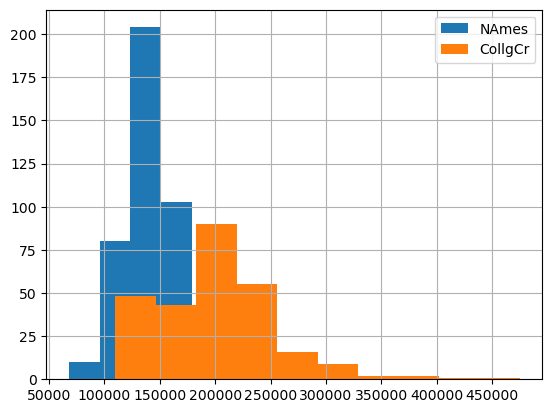

In [85]:
ax = n_ames.hist(label = 'NAmes')
college_cr.hist(ax=ax, label = 'CollgCr')
ax.legend()

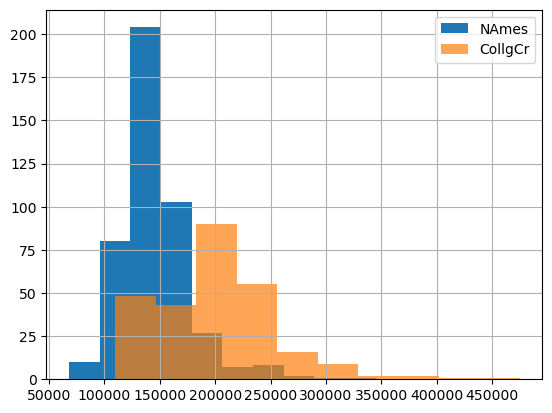

In [87]:
alpha = 0.7
ax = n_ames.hist(label = 'NAmes')
college_cr.hist(ax=ax, label = 'CollgCr', alpha = alpha)
ax.legend()

<Axes: xlabel='SalePrice'>

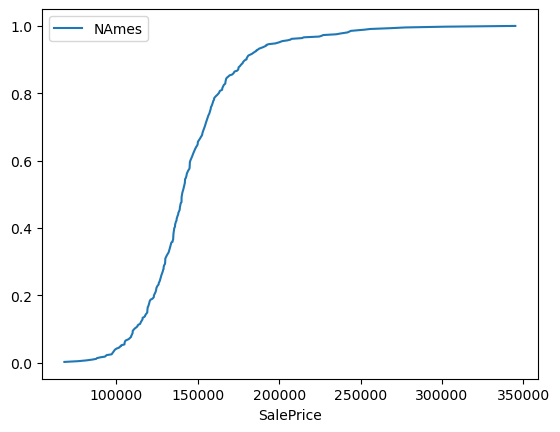

In [88]:
(
    n_ames
    .to_frame()
    .assign(cdf = n_ames.rank(method = 'average', pct = True))
    .sort_values(by = 'SalePrice')
    .plot(x = 'SalePrice', y = 'cdf', label = 'NAmes')
)

In [89]:
def plot_cdf(ser, ax = None, label = ''):
    (
        ser
        .to_frame()
        .assign(cdf = ser.rank(method = 'average'), pct = True)
        .sort_values(by = 'SalePrice')
        .plot(x = 'SalePrice', y = 'cdf', label = label, ax = ax)
    )
    return ser

0       215000
1       105000
2       172000
3       244000
23      149000
         ...  
2630    155000
2631    134500
2632    120000
2633    105000
2634    124000
Name: SalePrice, Length: 443, dtype: int64

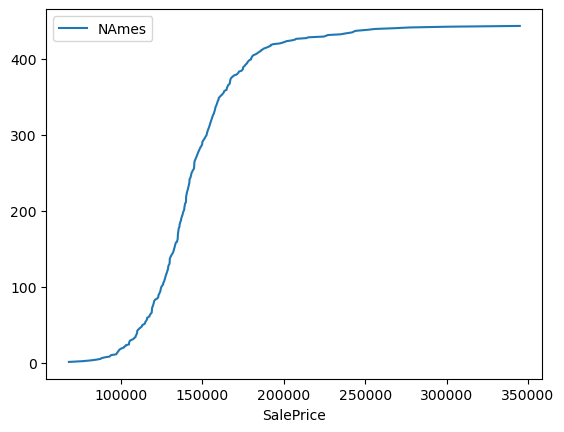

In [90]:
plot_cdf(n_ames, label = 'NAmes')

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: int64

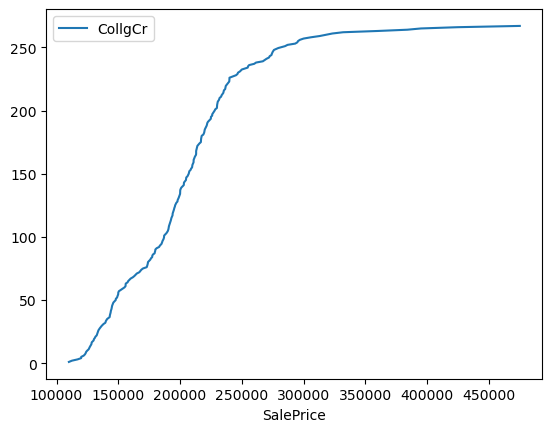

In [91]:
plot_cdf(college_cr, label = 'CollgCr')

In [93]:
import matplotlib.pyplot as plt

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: int64

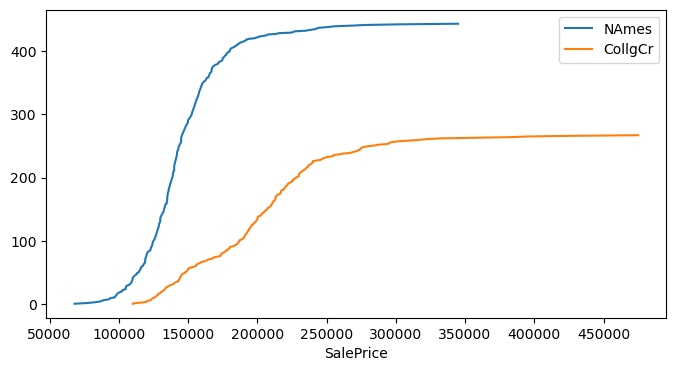

In [95]:
fig, ax = plt.subplots(figsize = (8,4))
plot_cdf(n_ames, label = 'NAmes', ax = ax)
plot_cdf(college_cr, label = 'CollgCr', ax = ax)

### C. Running Statistical Tests

In [96]:
print(dir(stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

In [97]:
stats.ks_2samp?

Signature:
stats.ks_2samp(
    data1,
    data2,
    alternative='two-sided',
    method='auto',
    *,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

This test compares the underlying continuous distributions F(x) and G(x)
of two independent samples.  See Notes for a description of the available
null and alternative hypotheses.

Parameters
----------
data1, data2 : array_like, 1-Dimensional
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the null and alternative hypotheses. Default is 'two-sided'.
    Please see explanations in the Notes below.
method : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):
    
      * 'auto' : use 'exact' for smal

In [98]:
ks_statistic, p_value = stats.ks_2samp(n_ames, college_cr)
print(ks_statistic, p_value)

0.5836609430085982 3.2892428354379855e-53


In [99]:
if p_value > 0.05:
    print('Fail to reject Null Hypothesis i.e. This two are from the same distribution')
else:
    print('Reject Null Hypothesis : Not from the same distribution')

Reject Null Hypothesis : Not from the same distribution


### D. Testing for Normality

In [101]:
# Shapiro-Wilks test
shapiro_stats, p_value = stats.shapiro(n_ames)
print(shapiro_stats, p_value)

0.8932009892779424 5.124904026764063e-17


In [102]:
if p_value > 0.05:
    print('The distribution of the series is likely Normal (Fail to reject H0)')
else:
    print('The distribution of the series is likely not Normal (reject H0)')

The distribution of the series is likely not Normal (reject H0)


In [103]:
stats.probplot?

Signature:
stats.probplot(
    x,
    sparams=(),
    dist='norm',
    fit=True,
    plot=None,
    rvalue=False,
)
Docstring:
Calculate quantiles for a probability plot, and optionally show the plot.

Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (the normal distribution by default).
`probplot` optionally calculates a best-fit line for the data and plots the
results using Matplotlib or a given plot function.

Parameters
----------
x : array_like
    Sample/response data from which `probplot` creates the plot.
sparams : tuple, optional
    Distribution-specific shape parameters (shape parameters plus location
    and scale).
dist : str or stats.distributions instance, optional
    Distribution or distribution function name. The default is 'norm' for a
    normal probability plot.  Objects that look enough like a
    stats.distributions instance (i.e. they have a ``ppf`` method) are also
    accepted.
fit : bool, optional
    F

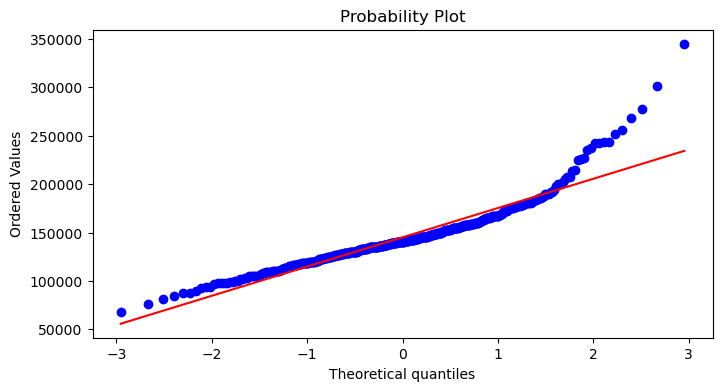

In [105]:
fig, ax = plt.subplots(figsize = (8,4))
_ = stats.probplot(n_ames, plot=ax)

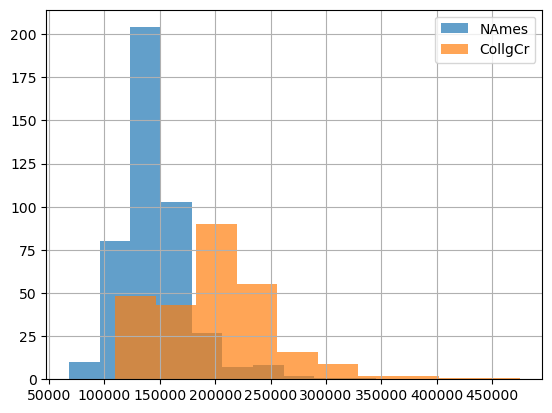

In [106]:
alpha = .7
ax = n_ames.hist(label = 'NAmes', alpha = alpha)
college_cr.hist(ax = ax, label = 'CollgCr', alpha = alpha)
ax.legend()

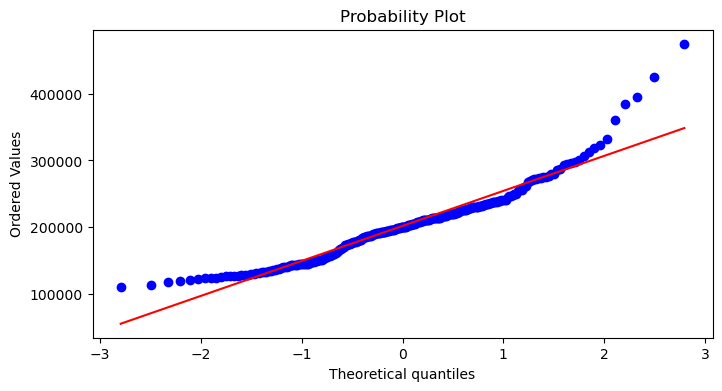

In [107]:
fig, ax = plt.subplots(figsize = (8,4))
_ = stats.probplot(college_cr, plot=ax)

### E. Challenge 4: Checking Square Footage Distributions

In [112]:
# Is the distribution of the 1st Flr SF from NAmes and CollgCr the same?
names_sf = (
    housing_2
    .query('Neighborhood == "NAmes"')
    .loc[:, '1st Flr SF']
)

college_cr_sf = (
    housing_2
    .query('Neighborhood == "CollgCr"')
    .loc[:, '1st Flr SF']
)

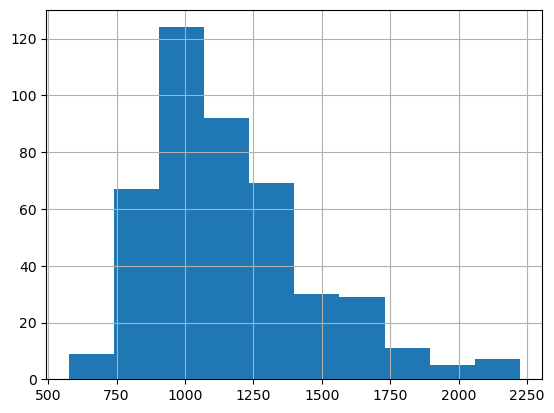

In [113]:
ax = names_sf.hist()

<Axes: >

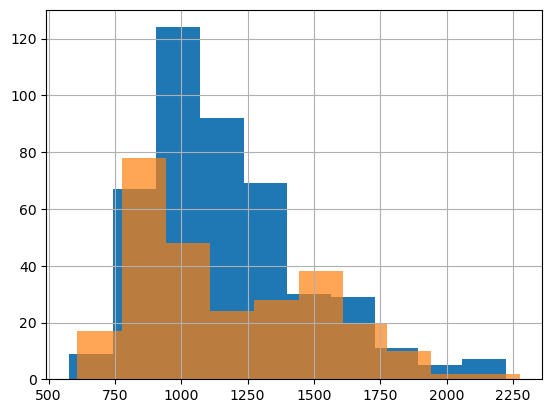

In [116]:
ax = names_sf.hist()
college_cr_sf.hist(ax=ax, alpha = .7)

In [117]:
ks_statistic, p_value = stats.ks_2samp(names_sf, college_cr_sf)
print(ks_statistic, p_value)

0.15300851362433526 0.0007057410997705426


In [118]:
if p_value > 0.05:
    print('Fail to reject Null Hypothesis i.e. This two are from the same distribution')
else:
    print('Reject Null Hypothesis : Not from the same distribution')

Reject Null Hypothesis : Not from the same distribution


##### Since, p_value < 0.005
##### So, the distribution of the 1st Flr SF from NAmes and CollgCr are not the same